In [1]:
import geopandas as gpd
import rasterio
import geemap
import pandas as pd
import numpy as np
from IPython.display import display
import ee

ee.Initialize()

Map = geemap.Map(center=[31.539096,-81.422318], zoom=10)

In [2]:
#Shapefile of LTER
gce_clipdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_lterdissolve.shp'
dissolve_ga = geemap.shp_to_ee(gce_clipdiss)

#Adding every plot coordinate
allplots_fc = 'C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/GA_allplots_NEW.csv'
fc_all = geemap.csv_to_ee(allplots_fc, latitude = "Latitude", longitude = "Longitude")

#GPD dataframe
ga_plots = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/GA_allplots_NEW.csv')

#GPD shapefile
marsh_bound = gpd.read_file('F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_lterdissolve.shp')

lter = gpd.read_file('F:/Wetlands shapefiles/GCE domain/GCE_LTER_boundary.shp')

In [3]:
display(marsh_bound.crs)
display(ga_plots)
display(lter.crs)

<Derived Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

,Plot,Zone,Site,Year,Plant_Biomass,Sample_Size,Longitude,Latitude,Species_Code,Date
0,1,1,1,2000,516.324,23,-81.422539,31.538627,A1,10/11/2000
1,1,1,1,2001,424.416,18,-81.422539,31.538627,A1,10/17/2001
2,1,1,1,2002,259.784,16,-81.422539,31.538627,A1,10/16/2002
3,1,1,1,2004,436.332,18,-81.422539,31.538627,A1,10/25/2004
4,1,1,1,2005,649.300,25,-81.422539,31.538627,A1,10/24/2005
...,...,...,...,...,...,...,...,...,...,...
3211,1,2,8,2012,0.000,1,-81.415765,31.309053,AX,10/12/2012
3212,2,2,8,2012,0.000,1,-81.415714,31.308965,AX,10/12/2012
3213,12,1,9,2017,0.000,1,-81.333824,31.352050,AX,10/20/2017
3214,15,1,9,2017,0.000,1,-81.334335,31.351793,AX,10/20/2017


<Derived Projected CRS: EPSG:26917>
Name: NAD83 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 84°W and 78°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Florida; Georgia; Kentucky; Maryland; Michigan; New York; North Carolina; Ohio; Pennsylvania; South Carolina; Tennessee; Virginia; West Virginia.
- bounds: (-84.0, 23.81, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

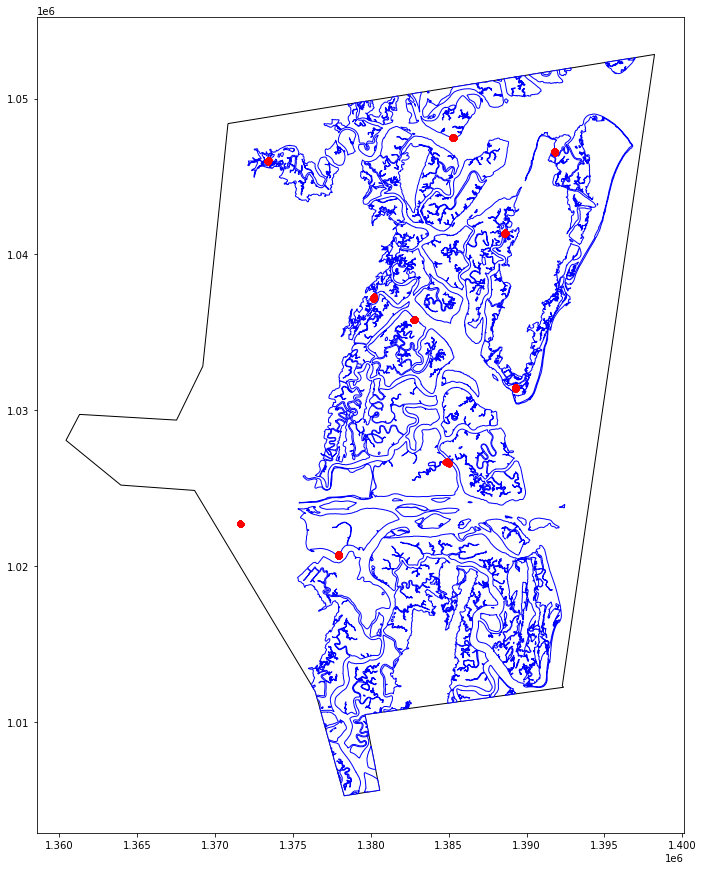

In [4]:
#crs = epsg 5070

from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon

df = ga_plots.copy()

# df.columns = ['0', '1', 'latitude', 'longitude', '4', '5']
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geodata = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)

#Convert to NAD 83
geodata = geodata.to_crs(5070)
lter = lter.to_crs(5070)

fig, ax = plt.subplots(1, figsize=(20, 15))
# ax.set_axis_off()
lter.plot(color='white', edgecolor = 'black', ax=ax)
marsh_bound.plot(color='white', edgecolor='blue', ax=ax)
geodata.plot(ax=ax, color = 'red', markersize=20)

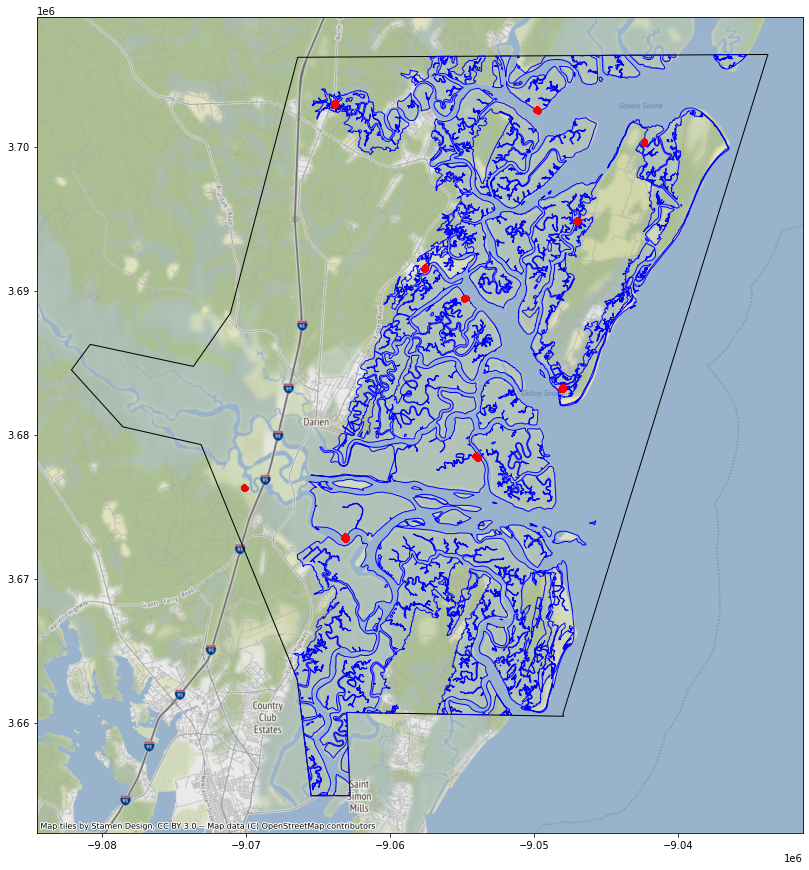

In [8]:
#Plotting with a basemap (webmap crs = 3857)

import contextily as cx

#crs transformation
lter2 = lter.to_crs(3857)
geodata2 = geodata.to_crs(3857)
marsh_bound2 = marsh_bound.to_crs(3857)

fig, ax = plt.subplots(1, figsize=(20, 15))
# ax.set_axis_off()
lter2.plot(color='none', edgecolor = 'black', ax=ax)
marsh_bound2.plot(color='none', edgecolor='blue', ax=ax)
geodata2.plot(ax=ax, color = 'red', markersize=20)

cx.add_basemap(ax, zoom = 12, source=cx.providers.Stamen.Terrain)

In [ ]:
#More maps